<a href="https://colab.research.google.com/github/HaroldRen99/22WEcon441/blob/main/22w441b_In_Class_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

# Select four columns to use as features (one just be trans_date_trans_time)

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [ ]:
df_select = df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]

# Create a unique variable out of trans_date.

In [ ]:
df_select["time_var"] = [i.second for i in df["trans_date_trans_time"].copy()]

<ipython-input-8-c087923e251c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df["trans_date_trans_time"].copy()]


In [ ]:
dummies = pd.get_dummies(df_select["category"])#.drop("is_fraud", axis = 1)
X = pd.concat([dummies, df_select[["amt","city_pop","time_var"]]], axis = 1)
y = df_select["is_fraud"]

In [ ]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17


# Oversample the data (this will be your training data).

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train a Logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Initialize the model
logistic_regression = LogisticRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.7844104231585602


# The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions with predict_proba
y_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Set the threshold for false negative percentage
threshold_list = [(i+1)/1000 for i in range(1000)]
false_negative_rate_list = []
for threshold in threshold_list:
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate false negative rate
    false_negative_rate = fn / (fn + tp)
    
    # Filter False Negetive Rate that is to large
    if abs(false_negative_rate - 0.05)  > 0.01:
        pass
    else:
        print("False Negative Rate: ", false_negative_rate)
        print("Threshhold: ", threshold)
    false_negative_rate_list.append((threshold, false_negative_rate))

False Negative Rate:  0.04004620021295411
Threshhold:  0.187
False Negative Rate:  0.041408745555936544
Threshhold:  0.188
False Negative Rate:  0.041408745555936544
Threshhold:  0.189
False Negative Rate:  0.041760661240547906
Threshhold:  0.19
False Negative Rate:  0.041760661240547906
Threshhold:  0.191
False Negative Rate:  0.04201331865514068
Threshhold:  0.192
False Negative Rate:  0.04201331865514068
Threshhold:  0.193
False Negative Rate:  0.04335781703993792
Threshhold:  0.194
False Negative Rate:  0.044133836241901425
Threshhold:  0.195
False Negative Rate:  0.045866344227680426
Threshhold:  0.196
False Negative Rate:  0.045866344227680426
Threshhold:  0.197
False Negative Rate:  0.04642579993142156
Threshhold:  0.198
False Negative Rate:  0.0469401382396997
Threshhold:  0.199
False Negative Rate:  0.047914673981700386
Threshhold:  0.2
False Negative Rate:  0.048320730540867336
Threshhold:  0.201
False Negative Rate:  0.048320730540867336
Threshhold:  0.202
False Negative Rat

From the results above, the best threshold (the false negative rate is closest to 0.05) should be 0.205.

# If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [ ]:
# Make predictions with trained model
y_pred_proba_or = logistic_regression.predict_proba(X)[:, 1]
y_pred_or = (y_pred_proba_or > 0.205).astype(int) # Using the results above

# Integrate the results into the original data
df['predictions'] = y_pred_or

# Get TN, FP, TP, FN
df_t = df[df["is_fraud"] == df["predictions"]].copy()
df_f = df[df["is_fraud"] != df["predictions"]].copy()

df_t["Gain or loss"] = 0.02 * df_t["amt"]
df_f["Gain or loss"] = -1 * df_f["amt"]

revenue = df_t["Gain or loss"].sum() + df_f["Gain or loss"].sum()
revenue

-35022622.136

# Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [ ]:
# Initialize the model
logistic_regression_Lasso = LogisticRegression("l1", solver = "liblinear")

# Train the model
logistic_regression_Lasso.fit(X_train, y_train)

# Get the coefficients
logistic_regression_Lasso.coef_

array([[-2.60132527e+00, -8.51355195e-01,  2.01429008e-01,
         3.73339304e-03, -6.62712049e-01, -5.14983915e-01,
        -1.48189759e+00, -6.05586159e-01, -3.40857608e+00,
        -4.06641966e-01, -2.39605187e-01, -4.59274701e+00,
        -4.39756572e+00,  1.47700031e-01,  1.06451610e-02,
        -5.42019014e-07,  1.37659409e-03]])

['entertainment', 'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'amt', 'city_pop', 'time_var']


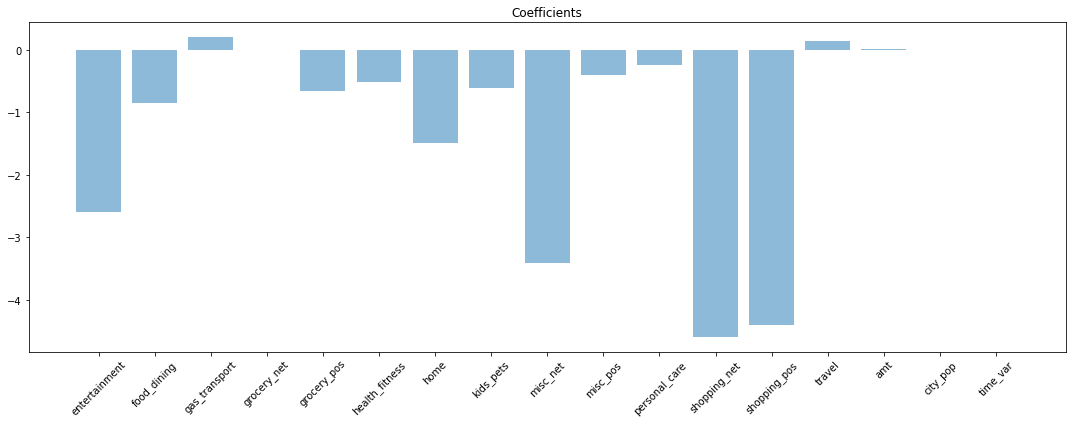

In [ ]:
# Plot the coefficients
objs = list(X_train.columns)
print(objs)
plt.figure(figsize = (15,6))
plt.bar(objs, logistic_regression_Lasso.coef_[0], alpha = 0.5)
plt.xticks(rotation=45)
plt.title("Coefficients")
plt.tight_layout()
plt.show()

From the results above, $category$ can be a good predictor but other variables selected perform poorly so maybe I may not select them.